In [9]:
import torch
import pandas as pd
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation import *

In [10]:
n=5
one=np.ones(n)
I=np.eye(n)
R=np.outer(one,one)/n
A,B=R,I
h_data,y_data,X_test,y_test=prepare_node_5()

In [11]:
model_class=MNISTClassifier_3layer
seed_for_model=42
criterion_class=nn.CrossEntropyLoss#or nn.BCELoss
epochs=10
lr=0.1
compute_accuracy=compute_accuracy_multiclass

In [12]:
torch.manual_seed(42)
model_list=[model_class() for _ in range(n)]
criterion=criterion_class()

In [13]:
def closure():
    total_loss=0
    for i,model in enumerate(model_list):
        for param in model.parameters():
            param.requires_grad = True
        model.zero_grad()
        output=model(h_data[i])
        loss=criterion(output,y_data[i])
        loss.backward()
        total_loss+=loss.item()
    return total_loss/(len(model_list))

In [14]:
closure()

12.860316371917724

In [15]:
model=MNISTClassifier_3layer()
output=model(h_data[1])
print(h_data[1].size())
print(output.size())
print(y_data[1].size())
criterion(output, y_data[1])

torch.Size([810, 784])
torch.Size([810, 10])
torch.Size([810])


tensor(30.4413, grad_fn=<NllLossBackward0>)

Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Training Progress: 100%|██████████| 100/100 [00:08<00:00, 12.44it/s, accuracy=37.6000000000%, epoch=100, loss=1.8556357145]


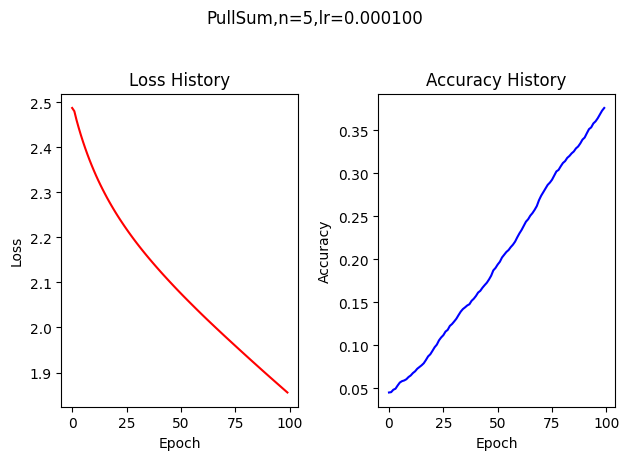

In [17]:
l,a=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_3layer,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=100,lr=(1e-4/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)